<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/american_citizens_annual_income_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/americancitizenincome/income.csv


In [ ]:
df=pd.read_csv('/kaggle/input/americancitizenincome/income.csv')

In [ ]:
df.shape

(25000, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
24999,60,Private,88055,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


# **EDA (Explotry Data Analysis)**
## **Data Preparations**
1. Data Cleaning
2. Data Explorationns
3. Data Spltting
4. Feature Engineering
5. Model Training
6. Improvement Models

**1. Data Cleaning**

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


**2. Data Exploration**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['income'].unique()

array(['>50K', '<=50K'], dtype=object)

In [ ]:
df['workclass'].unique()

array(['Self-emp-not-inc', 'Private', '?', 'Local-gov', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [ ]:
df['workclass']=df['workclass'].str.replace('?','Private')

/tmp/ipykernel_32/4090093893.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['workclass']=df['workclass'].str.replace('?','Private')


In [ ]:
df['workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'Local-gov', 'Self-emp-inc',
       'State-gov', 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['fnlwgt'].unique()

array([223881, 149118, 109209, ..., 278139, 130834, 420973])

In [ ]:
df['education.num'].unique()

array([15,  9, 10, 11,  1,  4,  8, 13, 14,  7,  6, 12,  2, 16,  5,  3])

In [ ]:
df['native.country'].unique()

array(['United-States', 'Mexico', '?', 'Japan', 'Ecuador', 'South',
       'Trinadad&Tobago', 'El-Salvador', 'Germany', 'Cuba', 'Philippines',
       'Italy', 'Honduras', 'Taiwan', 'Poland', 'Haiti',
       'Outlying-US(Guam-USVI-etc)', 'Columbia', 'China', 'England',
       'India', 'Portugal', 'Dominican-Republic', 'Vietnam', 'Canada',
       'Thailand', 'Puerto-Rico', 'Guatemala', 'Nicaragua', 'Ireland',
       'Iran', 'Peru', 'France', 'Hong', 'Jamaica', 'Yugoslavia',
       'Hungary', 'Cambodia', 'Laos', 'Greece', 'Scotland'], dtype=object)

In [ ]:
df['native.country'].mode()

0    United-States
Name: native.country, dtype: object

In [ ]:
df['native.country']=df['native.country'].str.replace('?','United-States')

/tmp/ipykernel_32/560433873.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['native.country']=df['native.country'].str.replace('?','United-States')


In [ ]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.072013,0.039921,0.078954,0.053195,0.071228
fnlwgt,-0.072013,1.000000,-0.044136,0.002188,-0.005649,-0.016832
education.num,0.039921,-0.044136,1.000000,0.123863,0.073813,0.149137
capital.gain,0.078954,0.002188,0.123863,1.000000,-0.032130,0.075063
capital.loss,0.053195,-0.005649,0.073813,-0.032130,1.000000,0.054526
hours.per.week,0.071228,-0.016832,0.149137,0.075063,0.054526,1.000000


/tmp/ipykernel_32/301846673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

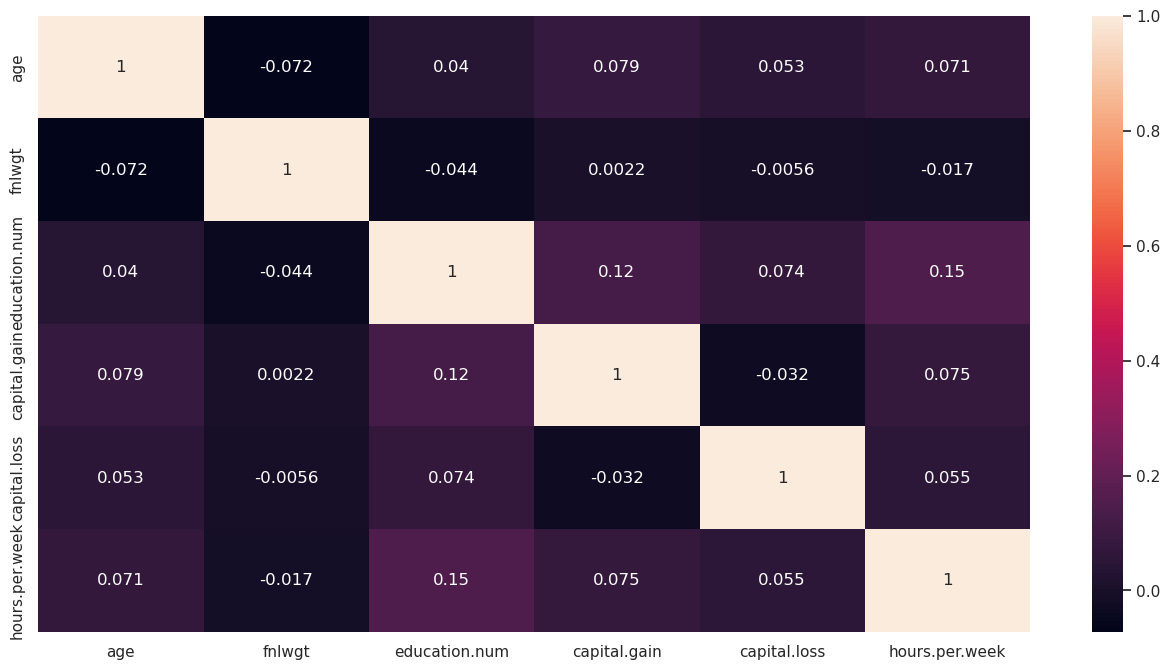

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df=df.drop(columns='fnlwgt',axis=1)

In [ ]:
df.shape

(25000, 14)

/tmp/ipykernel_32/301846673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

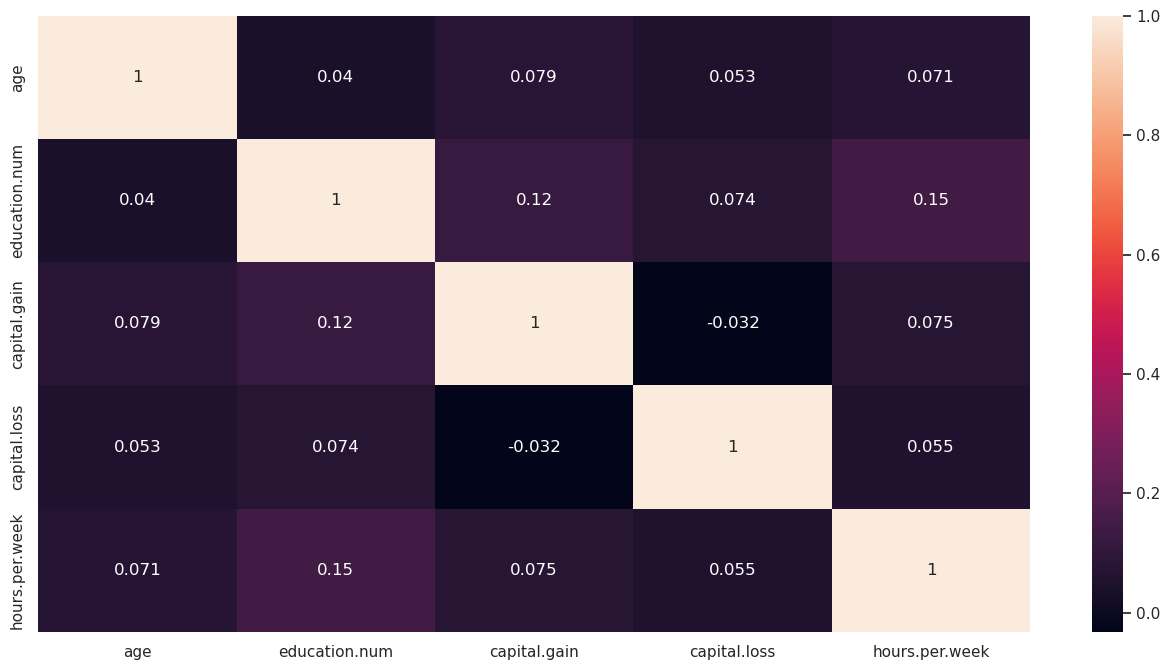

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
num_var=[]
cat_var=[]

for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        num_var.append(i)
    else:
        cat_var.append(i)

In [ ]:
num_var,cat_var

(['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'],
 ['workclass',
  'education',
  'marital.status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native.country',
  'income'])

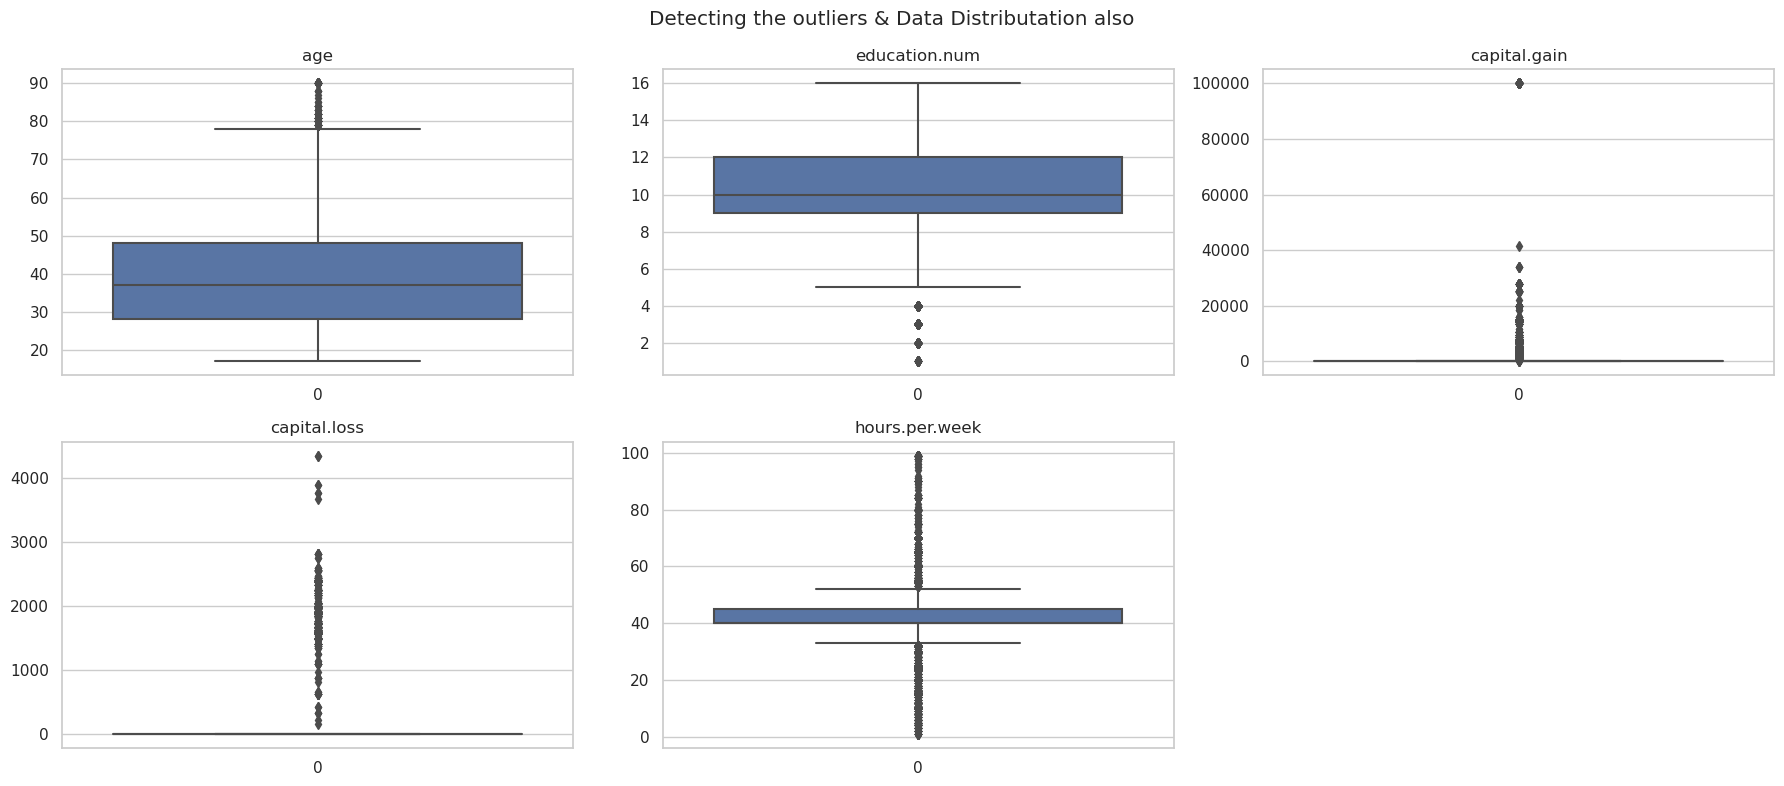

In [ ]:
plt.figure(figsize=(18,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[var])
    plt.title(var)
plt.suptitle('Detecting the outliers & Data Distributation also')
plt.tight_layout()
plt.show()

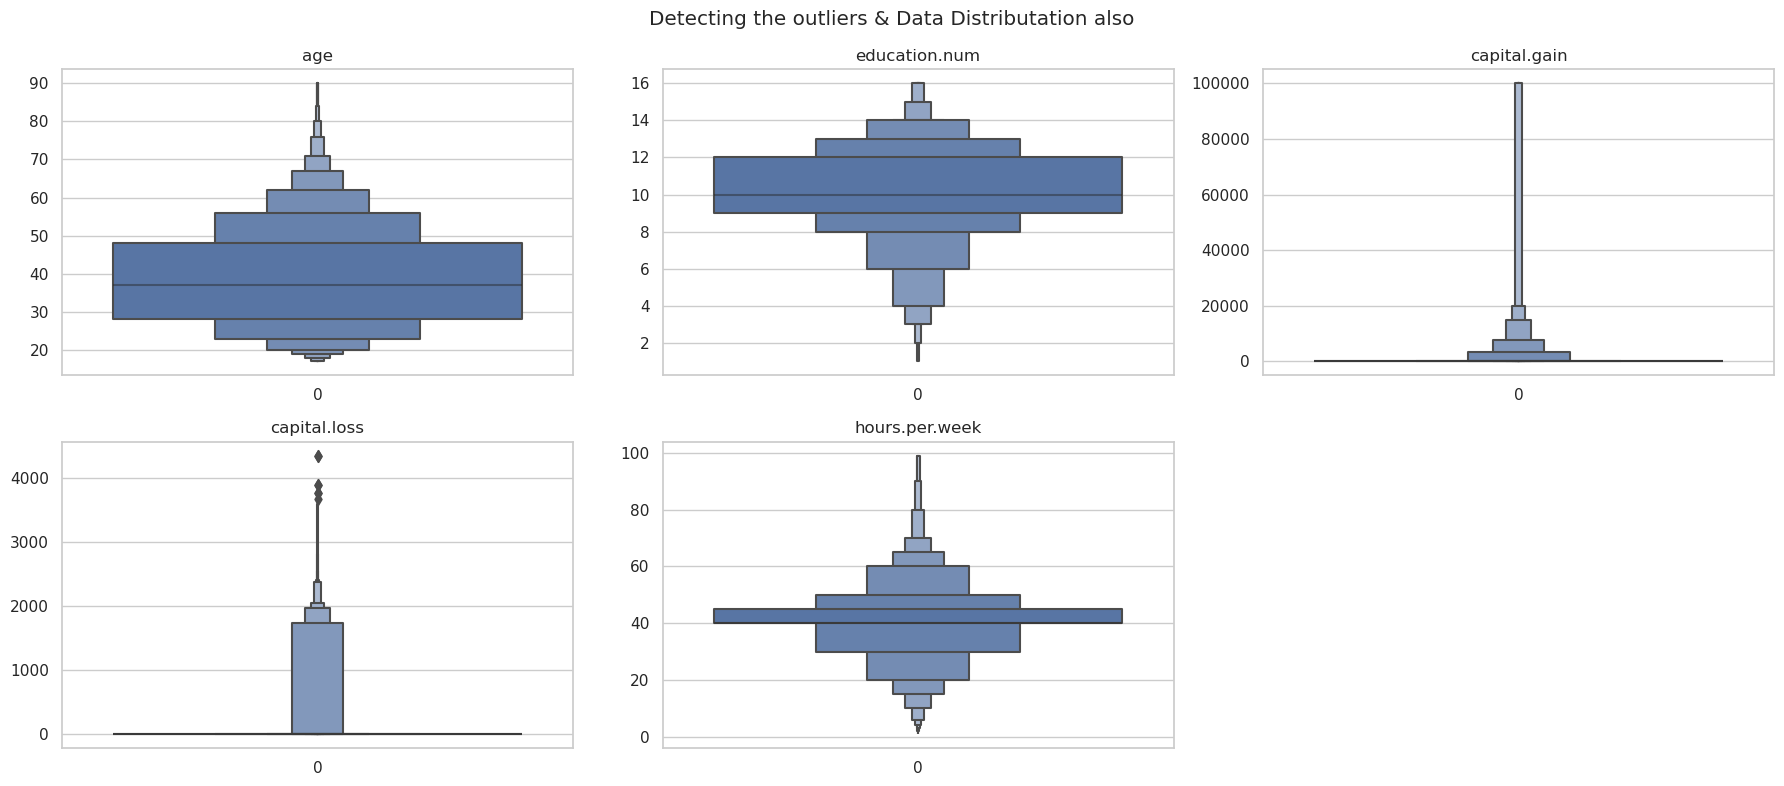

In [ ]:
plt.figure(figsize=(18,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(2,3,i+1)
    sns.boxenplot(df[var])
    plt.title(var)
plt.suptitle('Detecting the outliers & Data Distributation also')
plt.tight_layout()
plt.show()

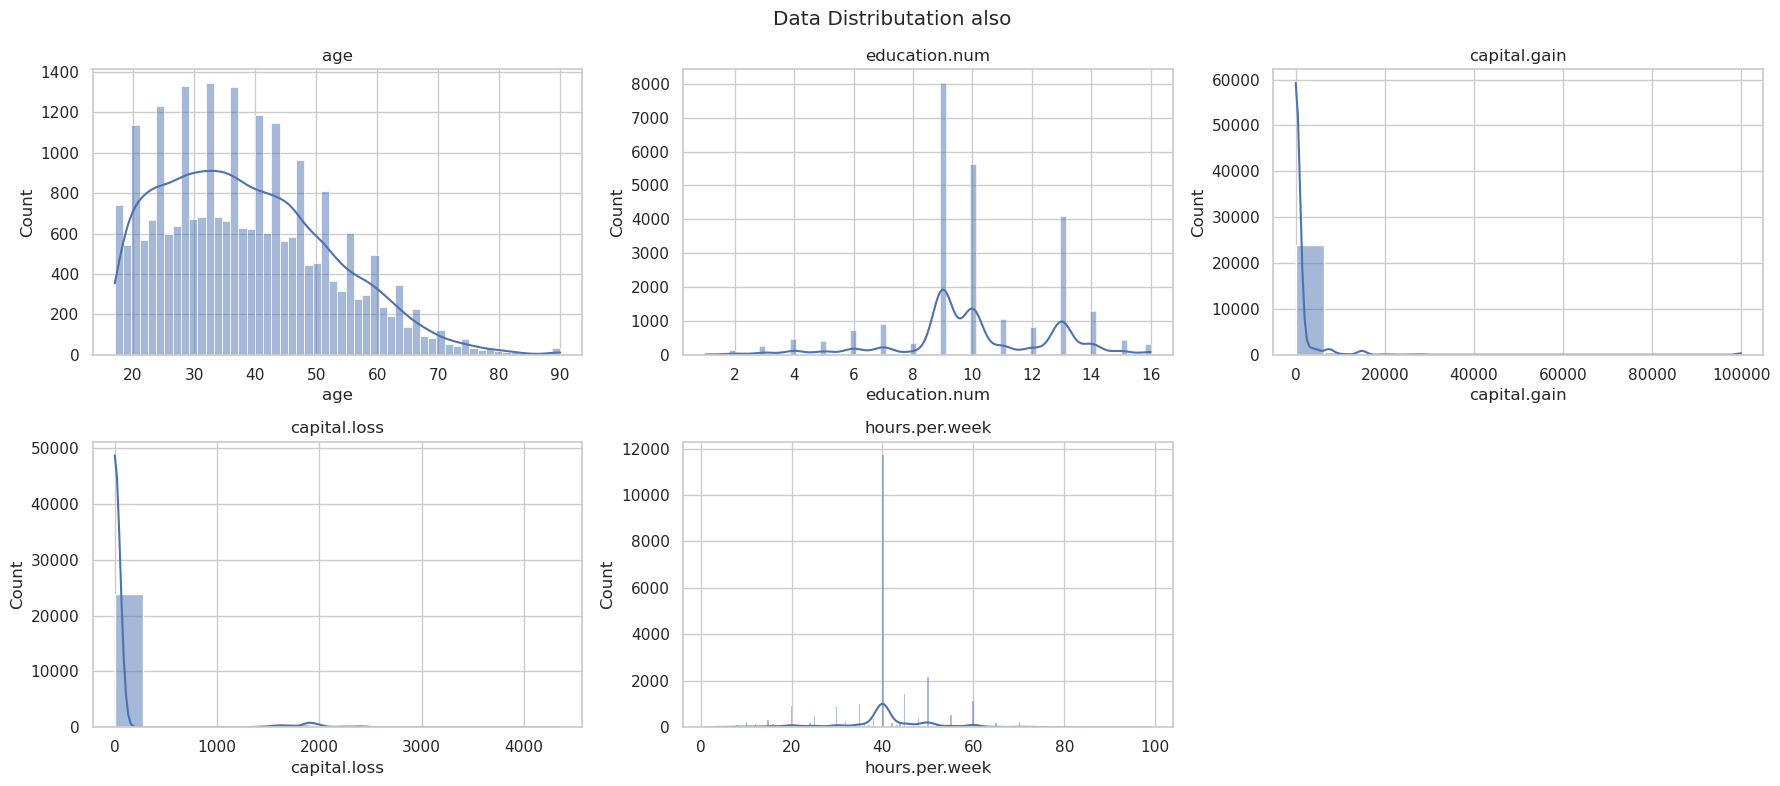

In [ ]:
plt.figure(figsize=(18,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(2,3,i+1)
    sns.histplot(df[var],kde=True)
    plt.title(var)
plt.suptitle('Data Distributation also')
plt.tight_layout()
plt.show()

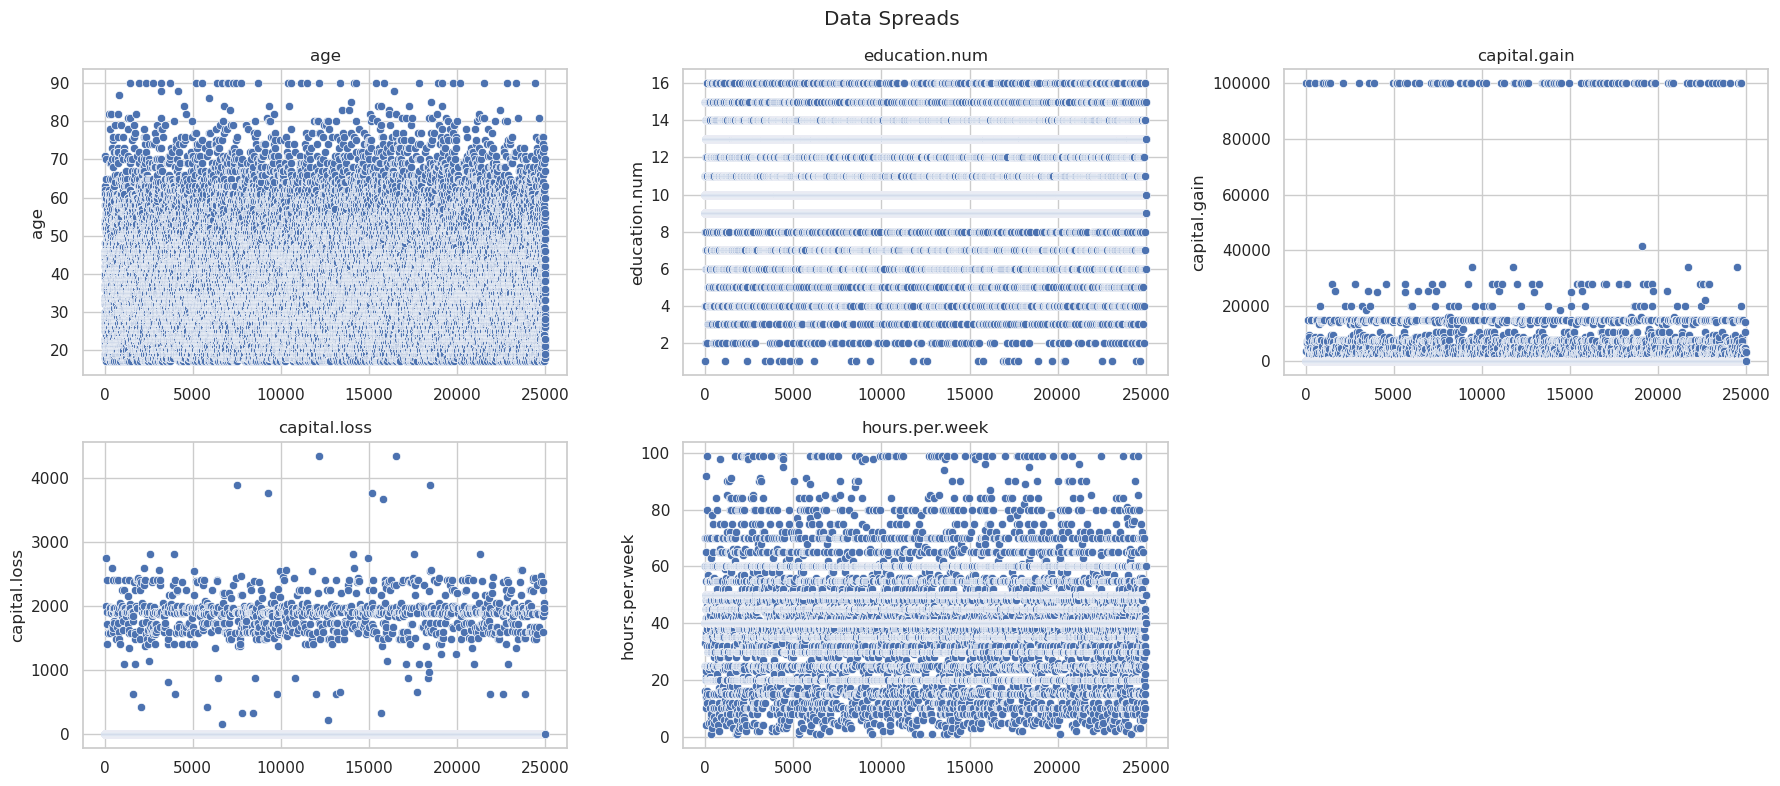

In [ ]:
plt.figure(figsize=(18,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(2,3,i+1)
    sns.scatterplot(df[var])
    plt.title(var)
plt.suptitle('Data Spreads')
plt.tight_layout()
plt.show()

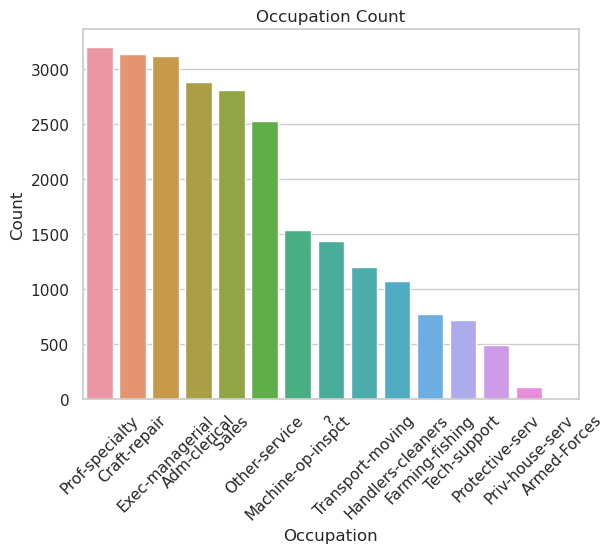

In [ ]:
# Create a bar plot
sns.barplot(x=df['occupation'].value_counts().index, y=df['occupation'].value_counts())

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

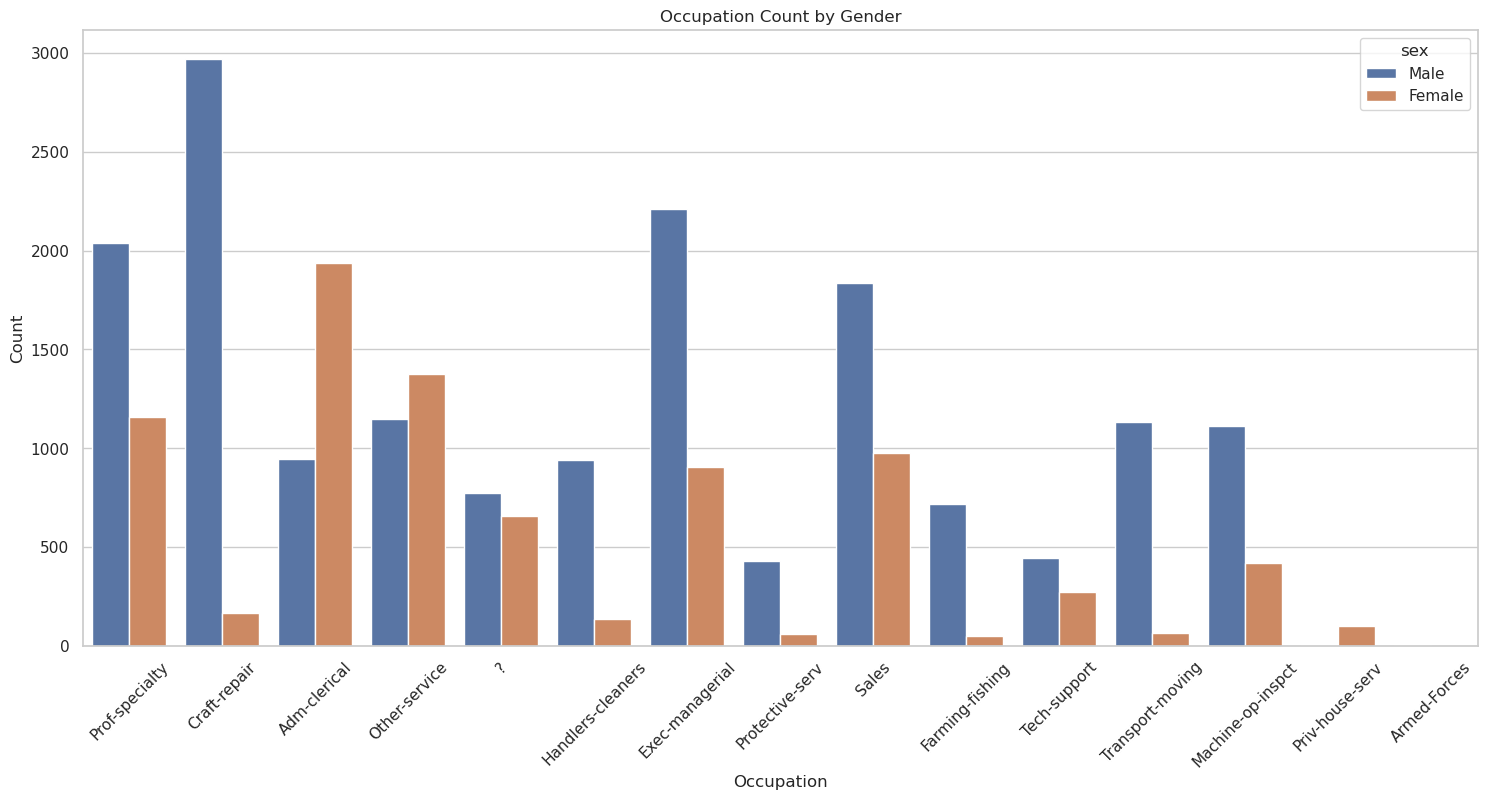

In [ ]:
plt.figure(figsize=(18,8))
# Create a count plot with hue parameter
sns.countplot(x='occupation', hue='sex', data=df)

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Count by Gender')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

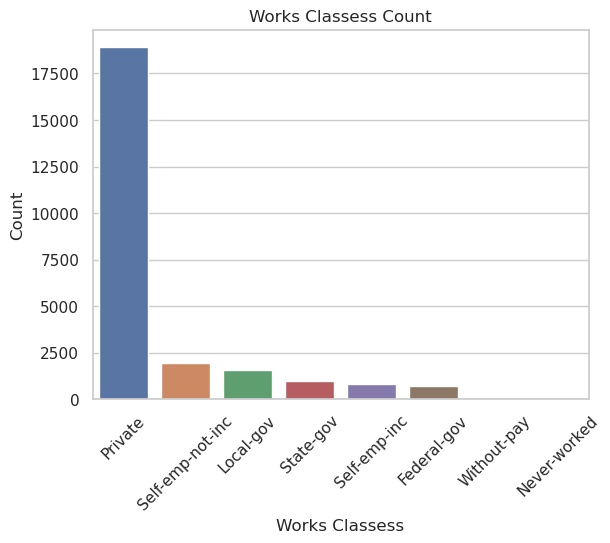

In [ ]:
# Create a bar plot
sns.barplot(x=df['workclass'].value_counts().index, y=df['workclass'].value_counts())

# Set labels and title
plt.xlabel('Works Classess')
plt.ylabel('Count')
plt.title('Works Classess Count')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
df['education'].unique()

array(['Prof-school', 'HS-grad', 'Some-college', 'Assoc-voc', 'Preschool',
       '7th-8th', '12th', 'Bachelors', 'Masters', '11th', '10th',
       'Assoc-acdm', '1st-4th', 'Doctorate', '9th', '5th-6th'],
      dtype=object)

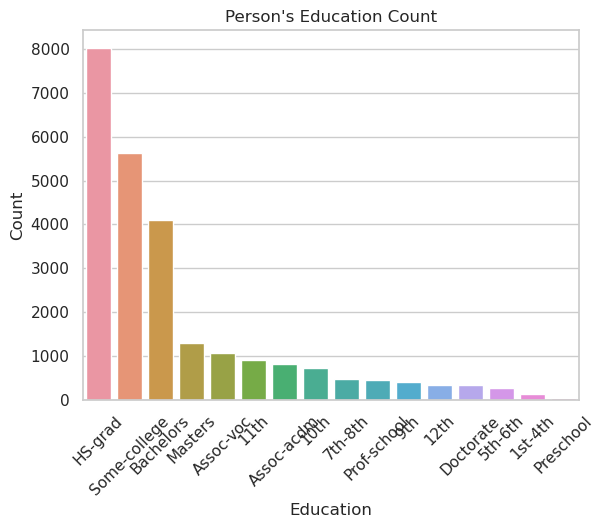

In [ ]:
# Create a bar plot
sns.barplot(x=df['education'].value_counts().index, y=df['education'].value_counts())

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("Person's Education Count")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

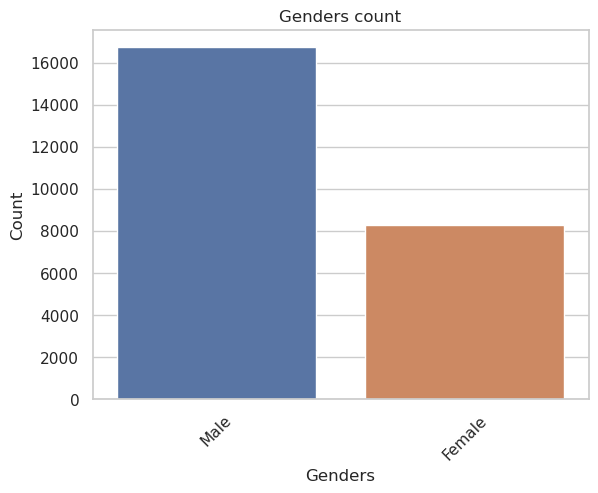

In [ ]:
# Create a bar plot
sns.barplot(x=df['sex'].value_counts().index, y=df['sex'].value_counts())
# Set labels and title
plt.xlabel('Genders')
plt.ylabel('Count')
plt.title("Genders count")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
df['native.country'].unique()

array(['United-States', 'Mexico', 'Japan', 'Ecuador', 'South',
       'Trinadad&Tobago', 'El-Salvador', 'Germany', 'Cuba', 'Philippines',
       'Italy', 'Honduras', 'Taiwan', 'Poland', 'Haiti',
       'Outlying-US(Guam-USVI-etc)', 'Columbia', 'China', 'England',
       'India', 'Portugal', 'Dominican-Republic', 'Vietnam', 'Canada',
       'Thailand', 'Puerto-Rico', 'Guatemala', 'Nicaragua', 'Ireland',
       'Iran', 'Peru', 'France', 'Hong', 'Jamaica', 'Yugoslavia',
       'Hungary', 'Cambodia', 'Laos', 'Greece', 'Scotland'], dtype=object)

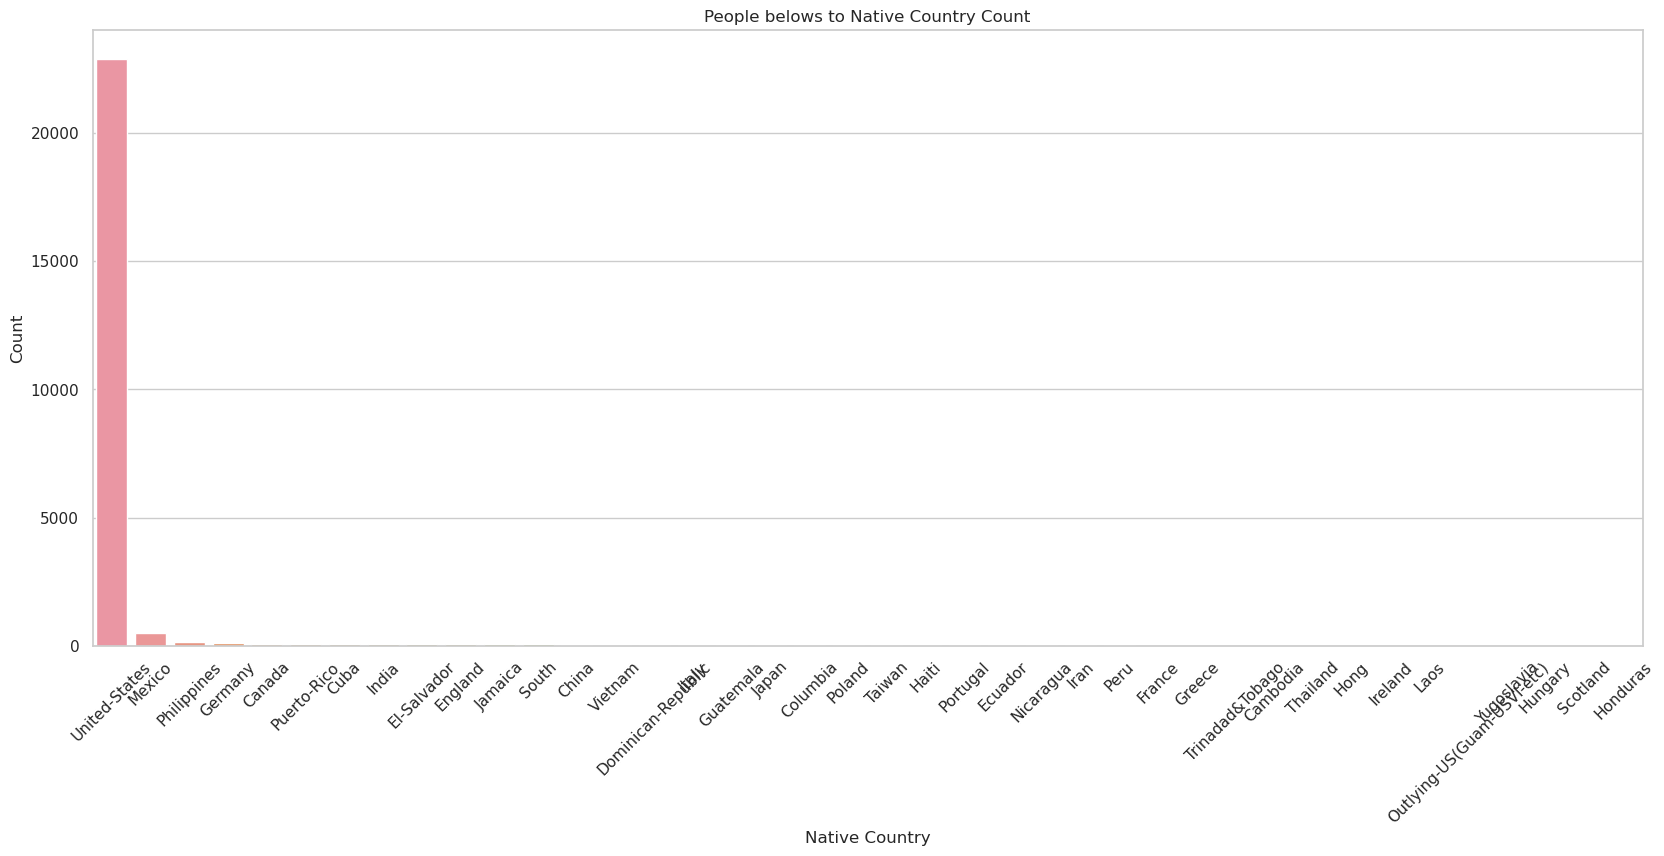

In [ ]:
plt.figure(figsize=(20,8))
# Create a bar plot
sns.barplot(x=df['native.country'].value_counts().index, y=df['native.country'].value_counts())

# Set labels and title
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title("People belows to Native Country Count")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

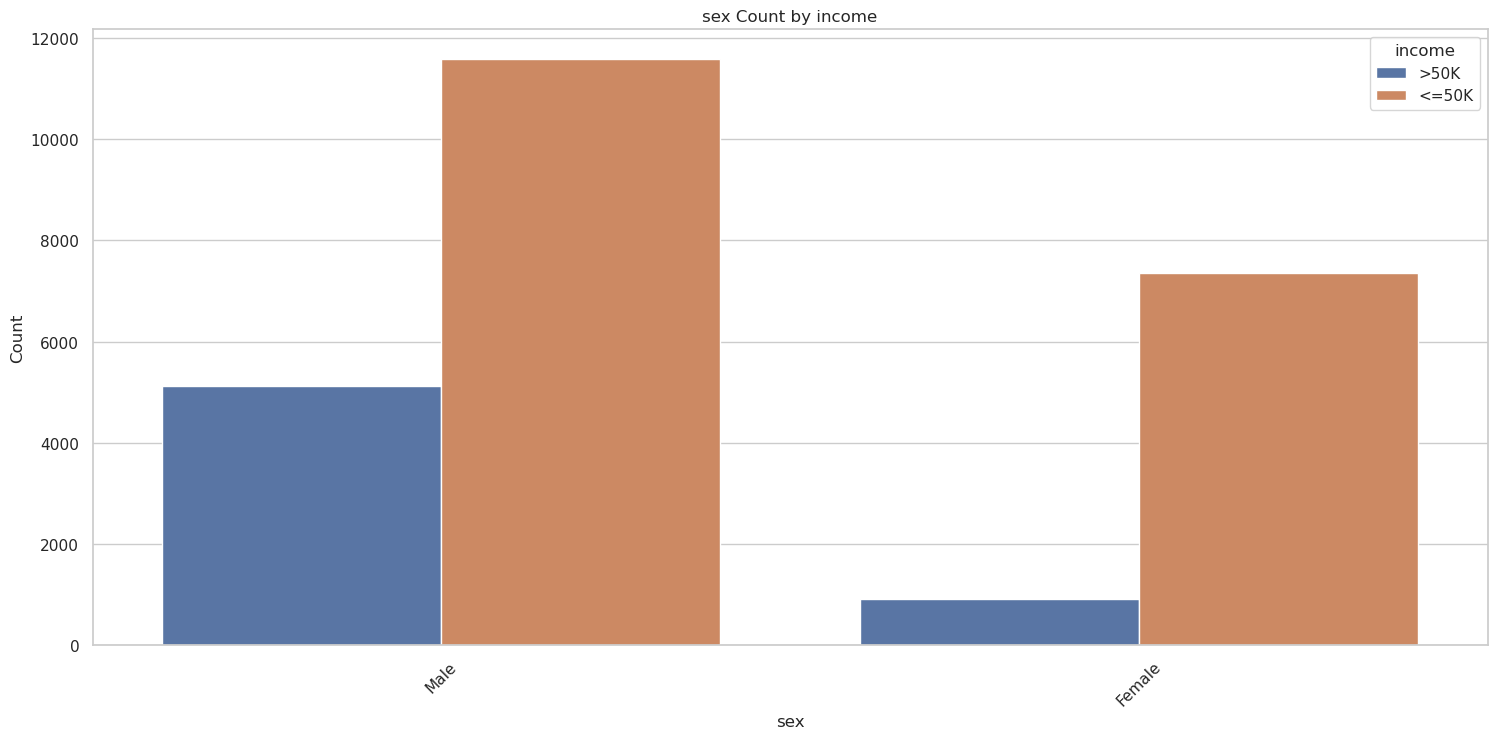

In [ ]:
plt.figure(figsize=(18,8))
# Create a count plot with hue parameter
sns.countplot(x='sex', hue='income', data=df)

# Set labels and title
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('sex Count by income')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

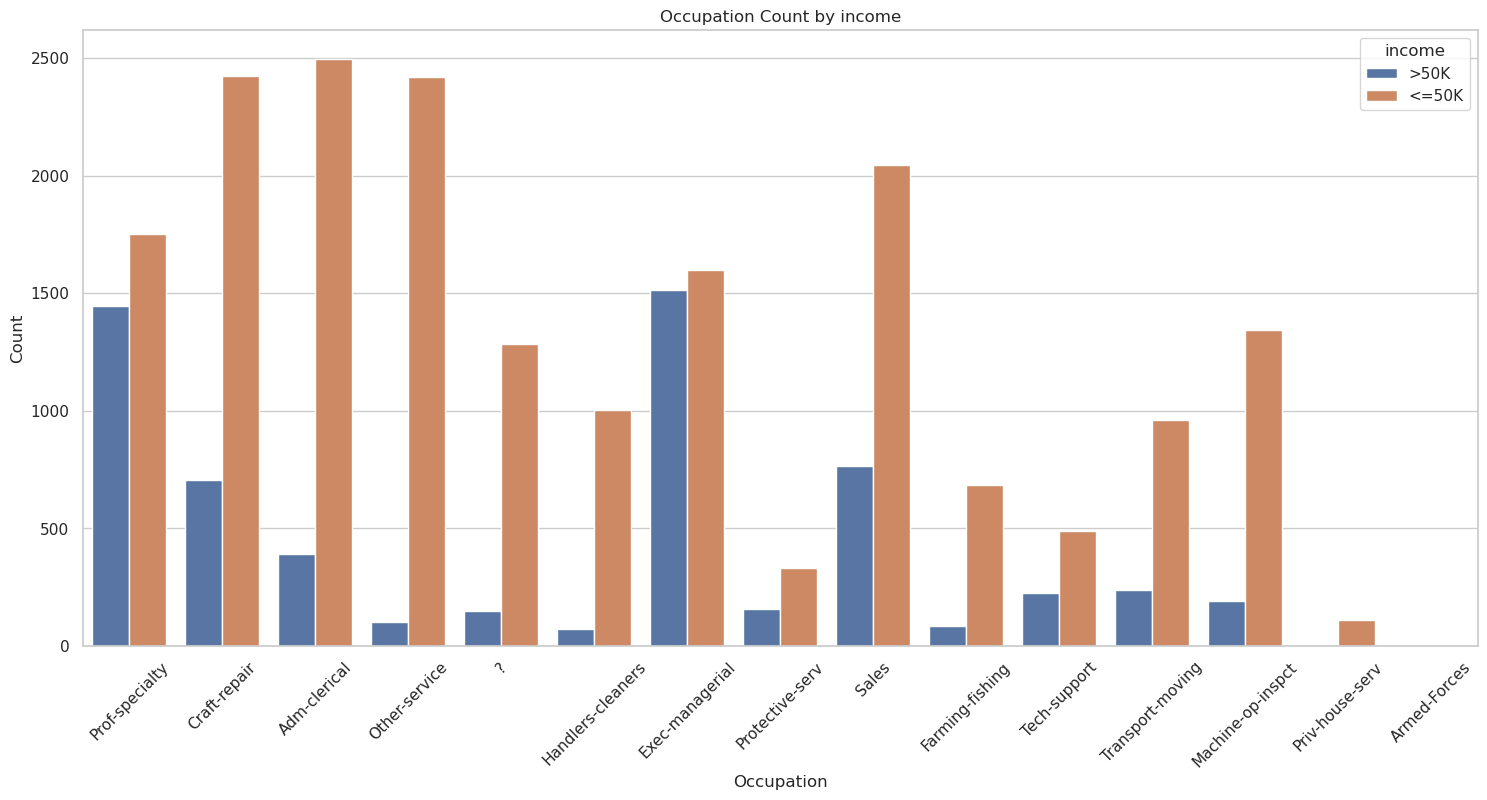

In [ ]:
plt.figure(figsize=(18,8))
# Create a count plot with hue parameter
sns.countplot(x='occupation', hue='income', data=df)

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Count by income')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

<Figure size 2000x800 with 0 Axes>

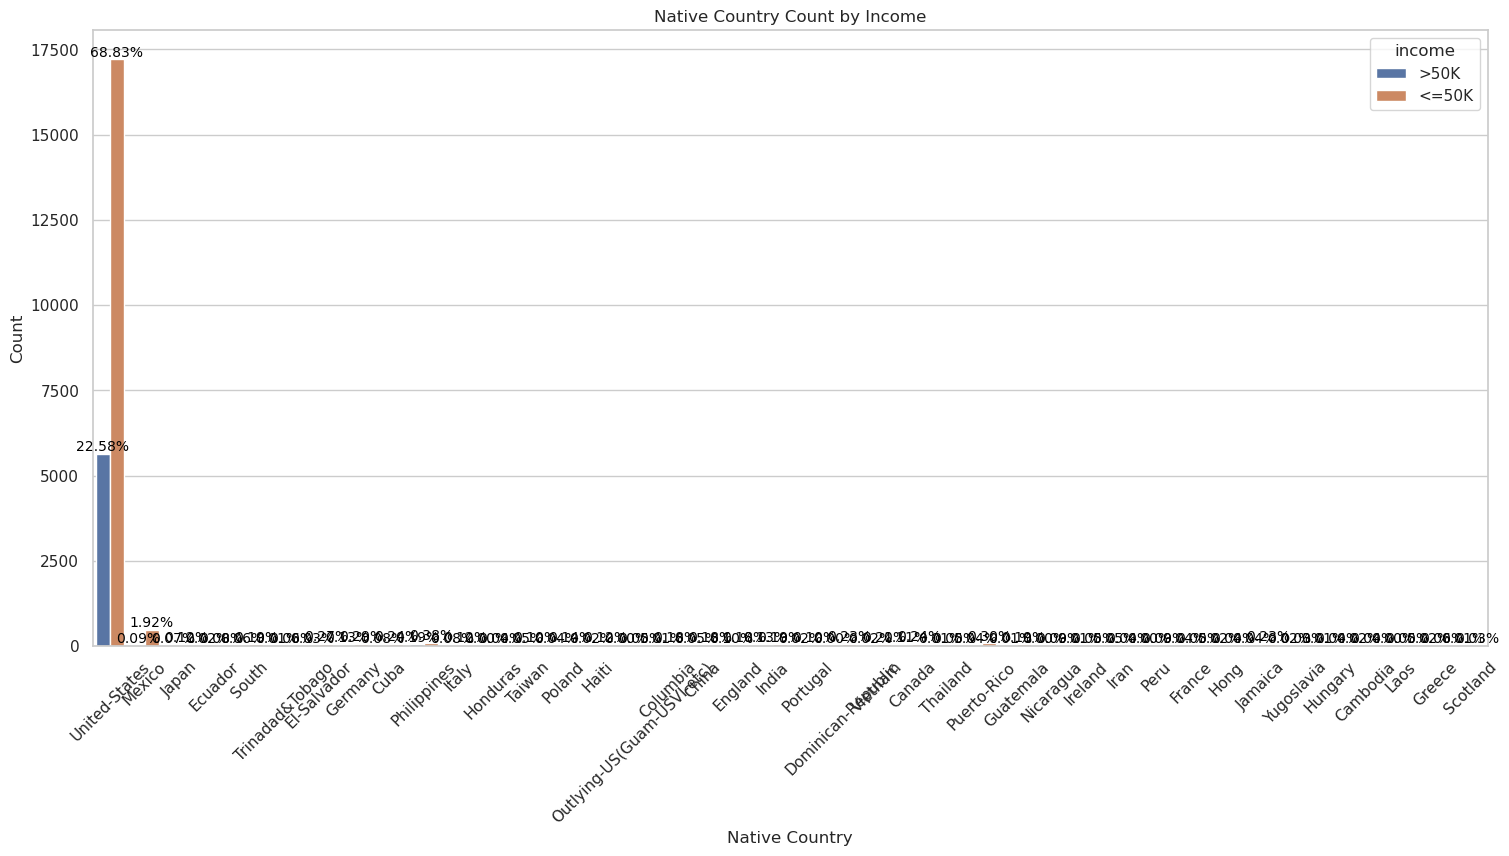

In [ ]:
plt.figure(figsize=(20,8))
# Set the style to white grid for better appearance
sns.set(style='whitegrid')

# Create the bar plot with hue parameter
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='native.country', hue='income', data=df)

# Set labels and title
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Native Country Count by Income')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Calculate the percentage for each category within each 'income' group
total_counts = len(df['native.country'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.show()

<Figure size 2000x800 with 0 Axes>

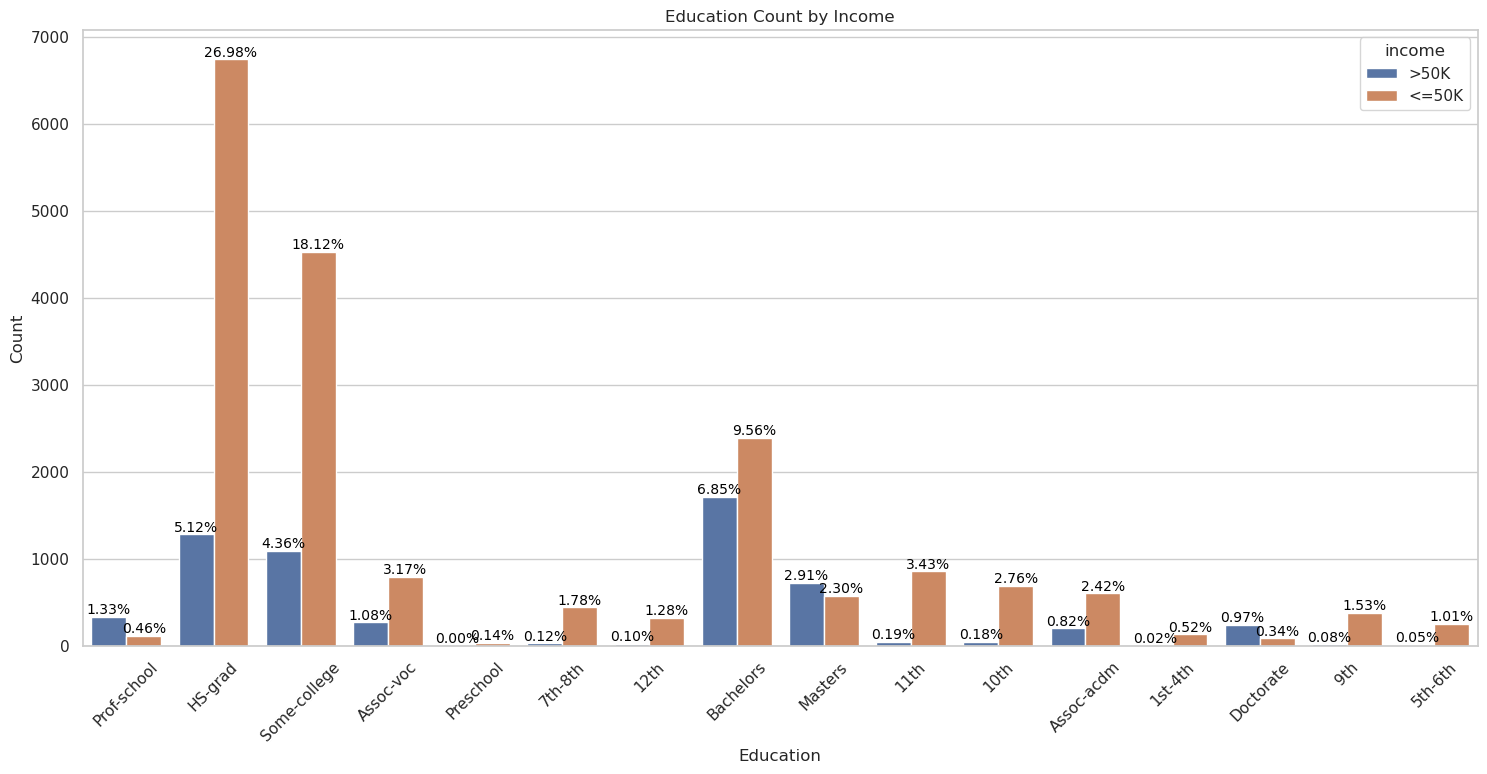

In [ ]:
plt.figure(figsize=(20,8))
# Create a count plot with hue parameter
sns.set(style='whitegrid')
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='education', hue='income', data=df)

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Count by Income')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Calculate the percentage for each category within each 'income' group
total_counts = len(df['education'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.show()

Thanks All Connection🙏